<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/ESAA_YB_week10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀 소개

- 회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

# 2. 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀는 독립변수 하나, 종속변수 하나

- 오류 합 계산할 때는 절댓값을 취해서 더하거나, 오류 값의 제곱을 구해서 더하는 방식(RSS)취함. 일반적으로 미분 들의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구함. (Error)^2 = RSS

# 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

- 경사 하강법

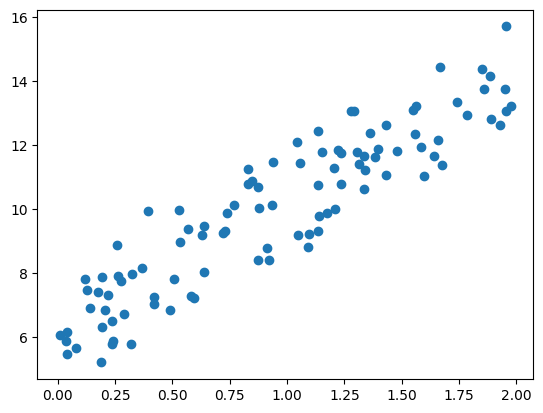

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y=6 + 4*X + np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [10]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y - y_pred))/N
  return cost

- 이제 경사 하강법을 gradient_descent()라는 함수를 생성해 구현해 보자.

In [11]:
# w1과 w0을 업데이트할 때 w1_update, w0_update를 반환
def get_weight_updates(w1,w0, X, y, learning_rate=0.01):
  N=len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update =np.zeros_like(w1)
  w0_update =np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) +w0
  diff=y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors =np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)* learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)* learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

- get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수인 gradient_descent_steps() 함수를 생성해보자.

In [12]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화
  w0 =np.zeros((1,1))
  w1=np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1=w1 - w1_update
    w0=w0 - w0_update
  return w1,w0

- gradient_descent_steps()를 호출해 w1과 w0을 구해 보자. 그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해 보자.

In [13]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y - y_pred))/N
  return cost

w1, w0= gradient_descent_steps(X,y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print( 'Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


- 앞에서 구한 y_pred에 기반해 회귀선 그려 보자.

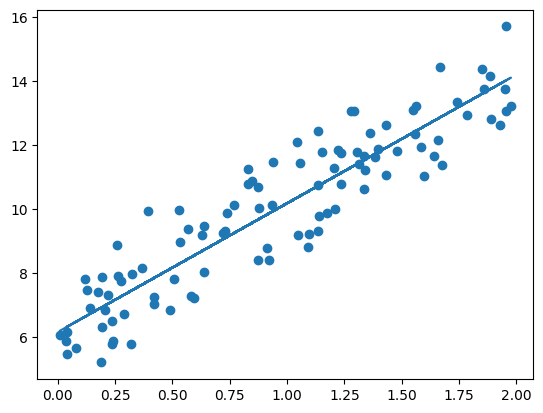

In [14]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 이제 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현해 보자. 이 함수는 앞에서 생성한 gradient_descent_steps()와 w1_update, w0_update를 계산하는 부분만 차이가 있음.

In [15]:
def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=1000):
  w0 =np.zeros((1,1))
  w1=np.zeros((1,1))
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_siz만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1=w1 - w1_update
    w0=w0 - w0_update

  return w1, w0

- w1, w0 및 예측 오류 비용을 계산해 보자.

In [16]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred=w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


# 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

# - LinearRegression 클래스 - Ordinary Least Squares

In [17]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True, n_jobs=1)

- Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음. 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중공신성 문제라고 함.

# - 회귀 평가 지표

- 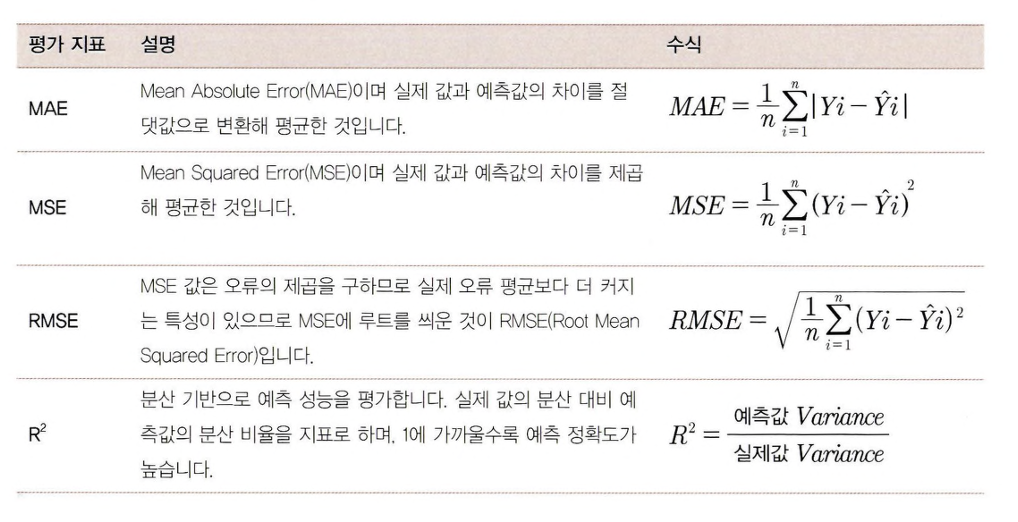

# - LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

- 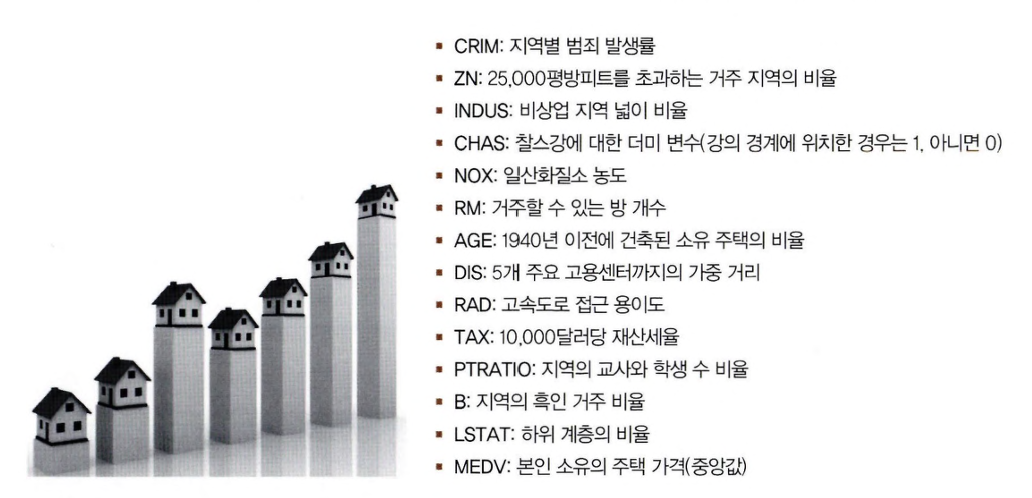

- 데이터 세트 로드하고 DataFrame으로 변경하자.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Dataset 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostonDF = pd.DataFrame(data, columns=feature_names)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
display(bostonDF.head())

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


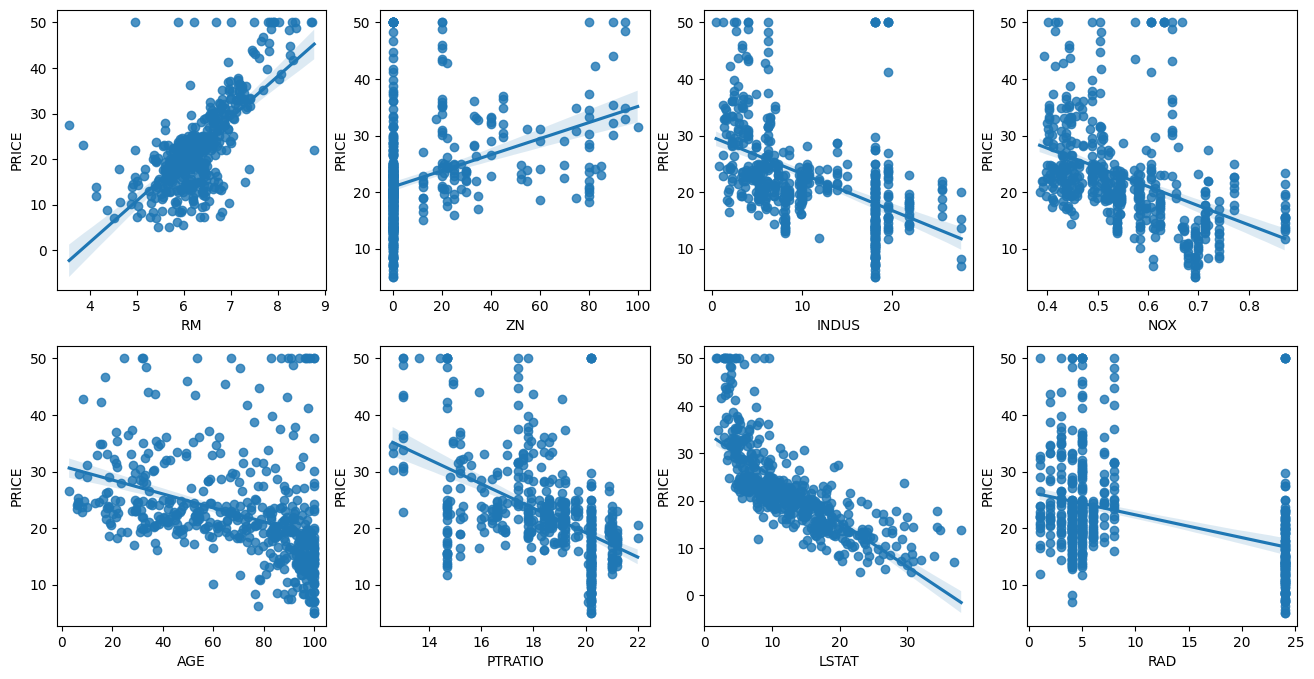

In [23]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- 이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들자. train_test_split()을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행하자. 그리고 metrics 모듈의 mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score를 측정하자.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


- LinearRegression으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값을 보자. 절편은 LinearRegression 객체의 intercept_ 속성에, 회귀 계수는 coef_ 속성에 값이 저장되어 있음.

In [25]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 걔수 값으로 다시 매핑하고, 높은 값 순으로 출력해 보자. 이를 위해 판다스 Series의 sort_values() 함수를 이용하자.

In [26]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Serise로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


- RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보임. 차츰 최적화를 수행하면서 피처 coefficients의 변화도 같이 살펴보자.

In [27]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별  RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE scores: ', np.round(avg_rmse, 2))

 5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별  RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE scores:  5.83


# 5. 다항 회귀와 과(대)적합/과소적합 이해

# - 다항 회귀 이해

In [28]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [29]:
def polynomial_func(X) :
  y=1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


- 이제 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현 됨.

In [30]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n',np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipleline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# - 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐. 즉, 차수가 높아질수록 과적합의 문제가 크게 발생함.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- 이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교하자. 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가하자. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보자.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


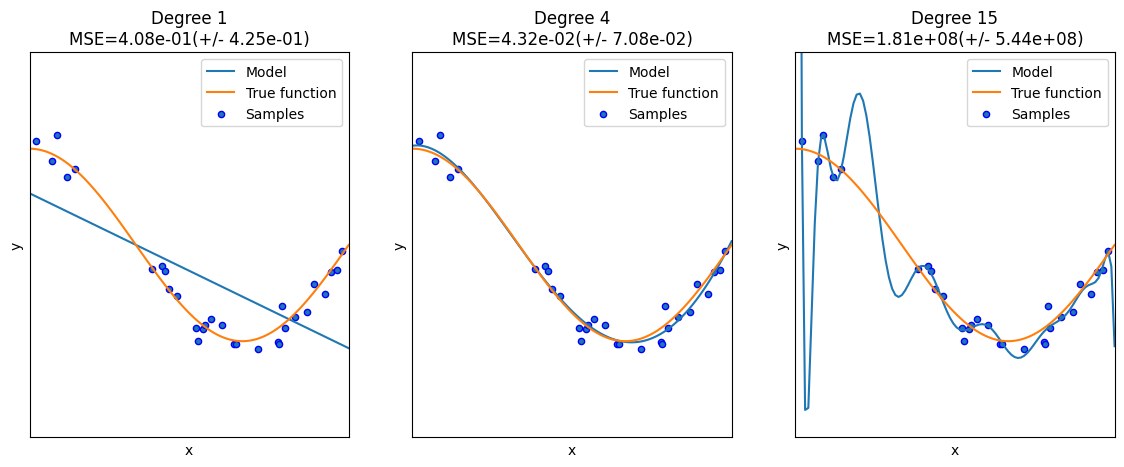

In [35]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키며 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores =  cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0 부터 1 까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  # 실제 값 곡선
  plt.plot(X_test, true_func(X_test), '-', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

# - 편향-분산 트레이드오프(Bias-Variance Trade off)

- 편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중 하나.

- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음. 편향과 분산이 서로 트레이트 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법.